technique pour s'assurer du pouvoir de généralisation du modele (Validation croisée) (Le modele doit avoir de tres bonne performance sur la base Train mais egalement sur une base independante)

#### Validation croisée

- Technique d'evaluation des performances des modeles d'apprentissage automatique
- Permet de tester la capacité de généralisation des modeles sur des données inconnues
- Elle consiste à diviser le jeu de données en deux parties : une partie pour l'entrainement du modele et une autre partie pour tester sa performance

**Les methodes de validation croisée:**

- **Validation croisée Hold-Out/ Train Test split**
    - Diviser le jeu de données en deux ensembles, un ensemble d'entrainement et un ensemble de test
    - Entrainer le modele sur l'ensemble d'entrainement et tester sur l'ensemble de test
    - Repeter plusieurs fois en choisissant à chaque fois un nouvel ensemble d'entrainement et de test de maniere aléatoire
    - Moyenner les resultats pour obtenir une estimation de la performance globale du modele
 
        - **Limites:** Si l'on a pas suffisament de données, la division 80 20 peut faire perdre les données
          
- **La validation croisée K-Fold**
    - Diviser le jeu de données en K sous-ensembles de taille egale ( chaque sous ensemble a la meme taille)
    -  Entrainer le modele sur K-1 sous-ensembles et tester sur le sous-ensemble restant (itération apres itération)
    -  Repeter K fois en chargeant à chaque fois les sous-ensembles utilisés pour l'entrainement et le test
    -  Moyenner les resultats pour obtenir une estimation de la performance globale du modele (moyenne de toutes les iterations)

  
- **Validation croisée Leave-One-Out**

    - Diviser le jeu de données en n sous-ensembles, chaque sous-ensemble ne contenant qu'une seule observation
    - Entrainer le modele sur n-1 observations et tester sur la seule observation restante
    - Repeter n fois en changeant à chaque fois l'observation utilisée pour le test
    - Moyenner les resultats pour obtenir une estimation de la performance globale du modele

- **Validation ccroisée stratifiée (tres utilisée, cf livre Aurelien Geron)**
S'assurer que la base Train est representative de la population globale
    - Diviser le jeu de données en sous-ensembles de maniere à ce que chaque sous-ensemble contienne une proportion équivalente de chaque classe
    - Entrainer et tester le modele sur chaque sous-ensembe
    - Moyenner les resultats pour obtenir une estimation de la performance globale du modele

In [4]:
# Importation des modules necessaires
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Importer les modules nécessaires
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

from sklearn.model_selection import (train_test_split, KFold, StratifiedKFold,
                                    LeaveOneOut, LeavePOut,
                                    cross_val_score)


In [6]:
bankdata=pd.read_csv("C:\\Users\\brech\\MonFichierDeTravail\\ML\\bank_cleaned.csv",sep=",",index_col=0)
bankdata.head()

,age,job,marital,education,default,balance,housing,loan,day,month,duration,campaign,pdays,previous,poutcome,response,response_binary
0,58,management,married,tertiary,no,2143,yes,no,5,may,4.35,1,-1,0,unknown,no,0
1,44,technician,single,secondary,no,29,yes,no,5,may,2.52,1,-1,0,unknown,no,0
2,33,entrepreneur,married,secondary,no,2,yes,yes,5,may,1.27,1,-1,0,unknown,no,0
5,35,management,married,tertiary,no,231,yes,no,5,may,2.32,1,-1,0,unknown,no,0
6,28,management,single,tertiary,no,447,yes,yes,5,may,3.62,1,-1,0,unknown,no,0


In [8]:
# Renommer les colonnes
bankdata.rename(columns={
    'age': 'age',
    'job': 'profession',
    'marital': 'situation_familiale',
    'education': 'niveau_etudes',
    'default': 'defaut_credit',
    'balance': 'solde_bancaire',
    'housing': 'pret_immobilier',
    'loan': 'pret_personnel',
    'day': 'jour_du_mois',
    'month': 'mois',
    'duration': 'duree_appel',
    'campaign': 'nb_appels',
    'pdays': 'nb_jours_depuis_dernier_appel',
    'previous': 'nb_appels_precedents',
    'poutcome': 'resultat_campagne_precedente',
    'response': 'reponse_campagne_actuelle',
    'response_binary': 'reponse_campagne_actuelle_binaire'
}, inplace=True)

# Afficher les noms de colonnes mis à jour
print(bankdata.columns)

Index(['age', 'profession', 'situation_familiale', 'niveau_etudes',
       'defaut_credit', 'solde_bancaire', 'pret_immobilier', 'pret_personnel',
       'jour_du_mois', 'mois', 'duree_appel', 'nb_appels',
       'nb_jours_depuis_dernier_appel', 'nb_appels_precedents',
       'resultat_campagne_precedente', 'reponse_campagne_actuelle',
       'reponse_campagne_actuelle_binaire'],
      dtype='object')


In [10]:
import statsmodels.api as sm
# Selection des variables explicatives et la variable  d'intérert
x = bankdata[['age', 'profession', 'situation_familiale', 'niveau_etudes', 'defaut_credit', 'solde_bancaire', 
              'pret_immobilier', 'pret_personnel', 'duree_appel', 'nb_appels', 'nb_jours_depuis_dernier_appel',
              'nb_appels_precedents', 'resultat_campagne_precedente']]
y = bankdata['reponse_campagne_actuelle_binaire']

In [12]:
# Convertir les variables catégorielles en variables indicatrices (dummies)
x = pd.get_dummies(x, columns=['profession', 'situation_familiale', 'niveau_etudes', 'defaut_credit', 'pret_immobilier',
                               'pret_personnel',  'resultat_campagne_precedente'], drop_first=True)

In [14]:
# Ajouter une constante pour l'interception (necessaire pour le modele de regression)
x = sm.add_constant(x)
x.head()

,const,age,solde_bancaire,duree_appel,nb_appels,nb_jours_depuis_dernier_appel,nb_appels_precedents,profession_blue-collar,profession_entrepreneur,profession_housemaid,...,profession_unemployed,situation_familiale_married,situation_familiale_single,niveau_etudes_secondary,niveau_etudes_tertiary,defaut_credit_yes,pret_immobilier_yes,pret_personnel_yes,resultat_campagne_precedente_success,resultat_campagne_precedente_unknown
0,1.0,58,2143,4.35,1,-1,0,False,False,False,...,False,True,False,False,True,False,True,False,False,True
1,1.0,44,29,2.52,1,-1,0,False,False,False,...,False,False,True,True,False,False,True,False,False,True
2,1.0,33,2,1.27,1,-1,0,False,True,False,...,False,True,False,True,False,False,True,True,False,True
5,1.0,35,231,2.32,1,-1,0,False,False,False,...,False,True,False,False,True,False,True,False,False,True
6,1.0,28,447,3.62,1,-1,0,False,False,False,...,False,False,True,False,True,False,True,True,False,True


### 2. Creation du modele

In [16]:
# Instancier le modele de regression logistique
model = LogisticRegression(max_iter=10000, random_state=42)

### 3 Technique Validation Hold Out/ Train Test Split (tres utilisé)

#### 3.1 Avantages et inconvénients de la validation hold-out

La validation hold-out est une méthode simple et courante pour évaluer les performances d'un modèle d'apprentissage automatique. Elle consiste à diviser le jeu de données en un ensemble d'entraînement et un ensemble de test. L'ensemble d'entraînement est utilisé pour entraîner le modèle, tandis que l'ensemble de test est utilisé pour évaluer les performances du modèle.

Voici les avantages et les inconvénients de cette méthode :

#### 3.1.1 Avantages :

- La validation hold-out est simple et rapide à mettre en œuvre.
- Elle permet d'évaluer les performances du modèle sur des données qui n'ont pas été utilisées pour l'entraînement.
- Elle est utile lorsque le jeu de données est suffisamment grand pour être divisé en un ensemble d'entraînement et un ensemble de test représentatifs.

#### 3.1.2 Inconvénients :

- La division du jeu de données en deux ensembles peut entraîner une perte de précision et de généralité dans les performances du modèle.
- Si l'ensemble de test est trop petit, les performances du modèle peuvent être surévaluées ou sous-estimées.
- Si la division est mal effectuée, elle peut conduire à des biais de sélection et affecter les performances du modèle.

In [18]:
# Technique 1 : Train/Test Split
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Diviser les données en ensembles d'apprentissage et de test
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Entrainer le modele sur l'ensemble sur l'ensemble d'apprentissage
model.fit(x_train, y_train)

# Effectuer des predictions sur l'ensemble de test
y_pred = model.predict(x_test)

# Calculer la precision (accuracy) du modele
accuracy = accuracy_score(y_test, y_pred)

print(f"Accuracy avec la validation Hold-Out : {accuracy}")

Accuracy avec la validation Hold-Out : 0.8972946505080182


**approche à privelegier lorsqu'on a suffisament d'informations**

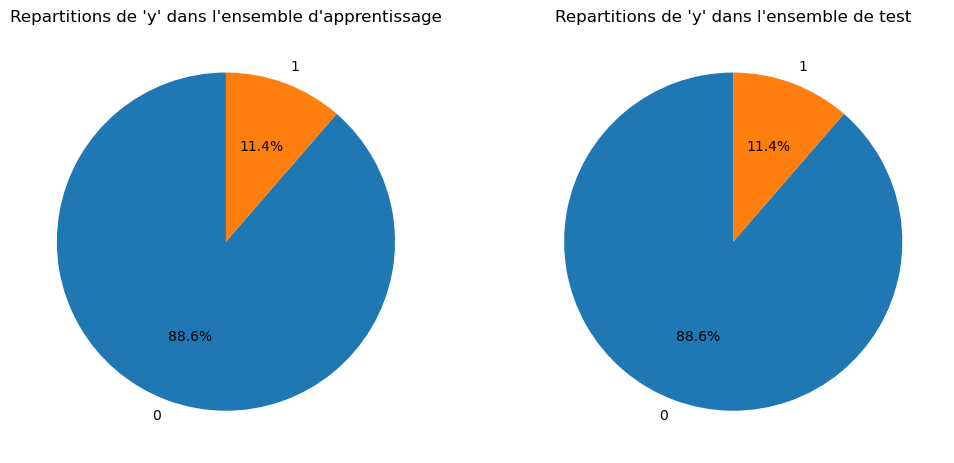

In [40]:
# Fonction pour tracer un diagramme en secteurs (camembert)
def plot_pie_chart(series, title, ax):
    # Compter les occurences de chaque classe dans'y'
    class_counts = y.value_counts()
#    counts = series.value_counts()
#    labels = counts.index.astype(str)
#    ax.pie(counts, labels=labels, autopct='%1.1f%%', startangle=90, colors=["#66b3ff", "#ff9999"])
    ax.pie(class_counts, labels=class_counts.index, autopct='%1.1f%%', startangle=90)    
    ax.set_title(title)

# Creer un diagramme en secteurs pour les ensembles d'apprentissage et de test
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))
plot_pie_chart(y_train, "Repartitions de 'y' dans l'ensemble d'apprentissage", ax1)
plot_pie_chart(y_test, "Repartitions de 'y' dans l'ensemble de test", ax2)

plt.show()

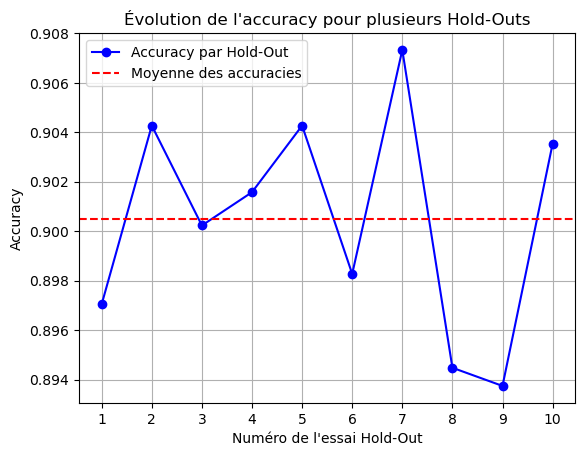

Accuracies pour chaque Hold-Out : [0.897049822499694, 0.9042722487452565, 0.900232586607908, 0.9015791406536908, 0.9042722487452565, 0.8982739625413148, 0.9073325988493084, 0.8944791284122904, 0.8937446443873179, 0.903537764720284]
Moyenne des accuracies : 0.9005


In [46]:
# Tester plusieurs pour valider la stabilité du modele
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


num_holdouts = 10
accuracies = []

# Répéter la validation Hold-Out plusieurs fois
for i in range(num_holdouts):
    # Diviser les données en ensembles d'apprentissage et de test
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42 + i)

    # Entraîner le modèle
    model.fit(x_train, y_train)

    # Prédictions
    y_pred = model.predict(x_test)

    # Accuracy
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)

# Tracer l'évolution de l'accuracy
iterations = np.arange(1, num_holdouts + 1)
plt.plot(iterations, accuracies, marker='o', linestyle='-', color='blue', label='Accuracy par Hold-Out')
plt.axhline(y=np.mean(accuracies), linestyle='--', color='red', label='Moyenne des accuracies')
plt.xlabel("Numéro de l'essai Hold-Out")
plt.ylabel('Accuracy')
plt.title("Évolution de l'accuracy pour plusieurs Hold-Outs")
plt.legend()
plt.xticks(iterations)
plt.grid()
plt.show()

print(f"Accuracies pour chaque Hold-Out : {accuracies}")
print(f"Moyenne des accuracies : {np.mean(accuracies):.4f}")

En sortie, notre accucary varie entre 89 et 90%, la variation est d'1%, ce qui signifie que les performance de mon modele sont donc stables, et en moyenne, l'accuracy est de 90%. Ici on peut conclure que le choix n'a pas trop d'impact car on a des performances qui ne fluctuent pas beaucoup

Par contre, il peut y avoir un risque que la representation ne soit pas la meme. Sur la base de train, on a 11.1% des clients qui etaient pret à souscrire au credit, à un depot à terme par contre sur la base de test, on est à 12%, en pratique, on a besoin que la base test puisse avoir la meme repartion que la base de train

### 4 Validation croisée Hold Out Stratifiée (tres utilisé)

#### 4.1 Avantages et inconvénients de la validation croisée stratifiée train-test split

La validation croisée stratifiée train-test split est une méthode d'évaluation de modèle qui consiste à diviser le jeu de données en un ensemble d'entraînement et un ensemble de test, tout en préservant la répartition des classes dans les deux ensembles. Elle est similaire à la validation hold-out, mais elle vise à éviter les biais de sélection liés à la répartition des classes.

Voici les avantages et les inconvénients de cette méthode :

#### 4.1.1 Avantages :

- La validation croisée stratifiée train-test split est simple et rapide à mettre en œuvre, comme la validation hold-out.
- Elle permet d'évaluer les performances du modèle sur des données qui n'ont pas été utilisées pour l'entraînement, tout en préservant la répartition des classes.
- Elle est utile lorsque le jeu de données est suffisamment grand pour être divisé en un ensemble d'entraînement et un ensemble de test représentatifs.

#### 4.1.2 Inconvénients :

- La validation croisée stratifiée train-test split peut être moins robuste que la validation croisée K-fold ou la validation leave-one-out pour les jeux de données très petits ou très déséquilibrés.
- Si l'ensemble de test est trop petit, les performances du modèle peuvent être surévaluées ou sous-estimées.
- Si la stratification n'est pas effectuée correctement, cela peut conduire à des biais de sélection et affecter les performances du modèle.

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Diviser les données en ensembles d'apprentissage et de test, stratifiées par la variable cible 'y'
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42, stratify=y)

# Entrainer le modele sur l'ensemble d'apprentissage
model.fit(x_train, y_train)

# Effectuer des predictions sur l'ensemble de test
y_pred = model.predict(x_test)

# Calculer la precision (accuracy) du modele
accuracy = accuracy_score(y_test, y_pred)

print(f"Accuracy avec la validation Hold-Out stratifiée : {accuracy}")

Accuracy avec la validation Hold-Out stratifiée : 0.9046394907577426


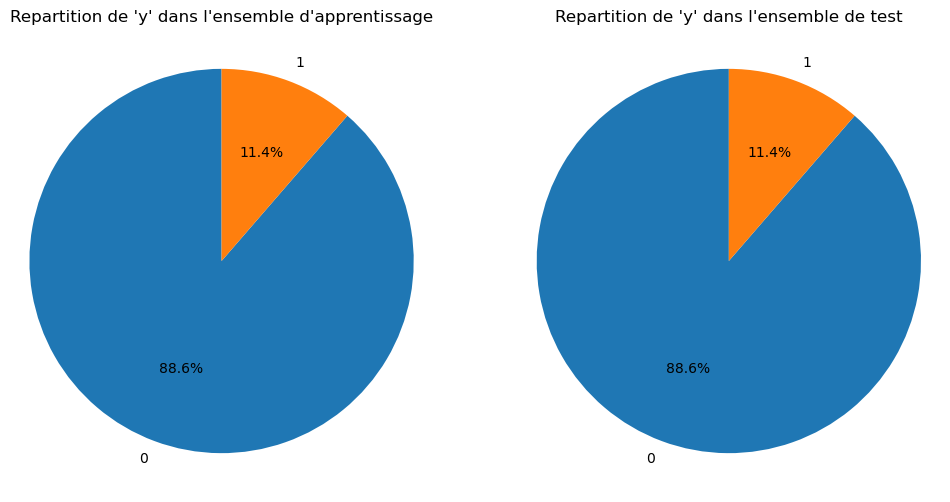

In [54]:
import matplotlib.pyplot as plt

def plot_pie_chart(y, title, ax):
    # Compter les occurences de chaque classe dans 'y'
    class_counts = y.value_counts()

    # Creer un diagramme en secteurs
    ax.pie(class_counts, labels=class_counts.index, autopct='%1.1f%%', startangle=90)
    ax.axis('equal') # pourque le diagramme soit un cercle
    ax.set_title(title)

# Diviser  les données en ensembles d'apprentisage et de test, stratifiés par la variable 'y'
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42, stratify=y)

# Creer un diagramme en secteurs pour les ensembles d'apprentissage et de test
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))
plot_pie_chart(y_train, "Repartition de 'y' dans l'ensemble d'apprentissage", ax1)
plot_pie_chart(y_test, "Repartition de 'y' dans l'ensemble de test", ax2)

plt.show()

On constate que la repartition est la meme sur la base de Train et sur la base de Test

**On peut creer une boucle** pour voir la stabilité de l'approche de validation croisée

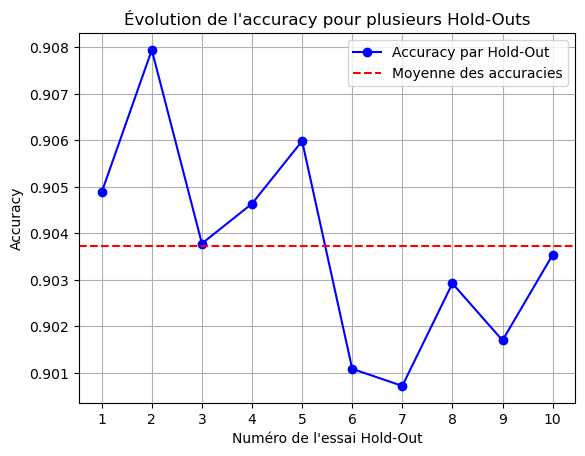

Accuracies pour chaque Hold-Out Stratifié : [0.9048843187660668, 0.9079446688701187, 0.9037825927286082, 0.9046394907577426, 0.9059860448035255, 0.9010894846370425, 0.9007222426245562, 0.9029256946994736, 0.9017015546578528, 0.903537764720284]
Moyenne des accuracies : 0.9037


In [57]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


num_holdouts = 10
accuracies = []

# Répéter la validation Hold-Out stratifiée plusieurs fois
for i in range(num_holdouts):
    # Diviser les données en ensembles d'apprentissage et de test, stratifiés par la variable "education"
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42 + i, stratify=y)

    # Entraîner le modèle sur l'ensemble d'apprentissage
    model.fit(x_train, y_train)

    # Prédictions sur l'ensemble de test
    y_pred = model.predict(x_test)

    # Accuracy (precision du modele)
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)

# Tracer l'évolution de l'accuracy
iterations = np.arange(1, num_holdouts + 1)
plt.plot(iterations, accuracies, marker='o', linestyle='-', color='blue', label='Accuracy par Hold-Out')
plt.axhline(y=np.mean(accuracies), linestyle='--', color='red', label='Moyenne des accuracies')

plt.xlabel("Numéro de l'essai Hold-Out")
plt.ylabel('Accuracy')
plt.title("Évolution de l'accuracy pour plusieurs Hold-Outs")
plt.legend()
plt.xticks(iterations)
plt.grid()
plt.show()

print(f"Accuracies pour chaque Hold-Out Stratifié : {accuracies}")
print(f"Moyenne des accuracies : {np.mean(accuracies):.4f}")

En stratifiant et en changeant la graine, on arrive à avoir des resulatats plutot coherents

### 5 Validation KFold (utilisé en pratique)

#### 5.1 Avantages et inconvénients de la validation croisée K-fold

La validation croisée K-fold est une méthode d'évaluation de modèle plus avancée que la validation hold-out. Elle consiste à diviser le jeu de données en K sous-ensembles (ou "folds") de taille égale (ou presque), puis à entraîner et évaluer le modèle K fois. À chaque fois, un sous-ensemble différent est utilisé pour l'évaluation, tandis que les K-1 autres sont utilisés pour l'entraînement.

Voici les avantages et les inconvénients de cette méthode :

#### 5.1.1 Avantages :

- La validation croisée K-fold est plus robuste et plus précise que la validation hold-out, car elle utilise l'ensemble de données dans son intégralité pour l'entraînement et l'évaluation du modèle.
- Elle permet d'obtenir une estimation plus fiable de la performance du modèle en moyenne, ainsi que de la variance de cette performance.
- Elle est utile lorsque le jeu de données est petit ou lorsque l'on souhaite maximiser l'utilisation de toutes les données disponibles pour l'entraînement et l'évaluation.

#### 5.1.2 Inconvénients :

- La validation croisée K-fold est plus complexe et plus coûteuse en temps de calcul que la validation hold-out, car elle nécessite K entraînements et évaluations du modèle.
- Elle peut être moins efficace lorsque le jeu de données est très grand, car les temps de calcul peuvent devenir prohibitifs.
- Si les folds ne sont pas choisis de manière représentative ou s'ils sont trop petits, cela peut affecter les performances du modèle et introduire des biais de sélection.

In [22]:
# Technique : K-Fold Cross Validation
kfold = KFold(n_splits=5, random_state=42, shuffle=True)
scores_kfold = cross_val_score(model, x, y, cv=kfold, scoring='accuracy') # si je faisais un model de regression sur le scoring, on pouvait mettre 
# la MAE, la MSE ou la RMSE 
print(f"Scores avec K-Fold Cross Validation: {scores_kfold}")
print(f"Moyenne des scores K-Flod: {np.mean(scores_kfold)}")

Scores avec K-Fold Cross Validation: [0.89729465 0.90646425 0.90303624 0.90352595 0.90756611]
Moyenne des scores K-Flod: 0.9035774413650708


La moyenne permet d'avoir le resulat du model global

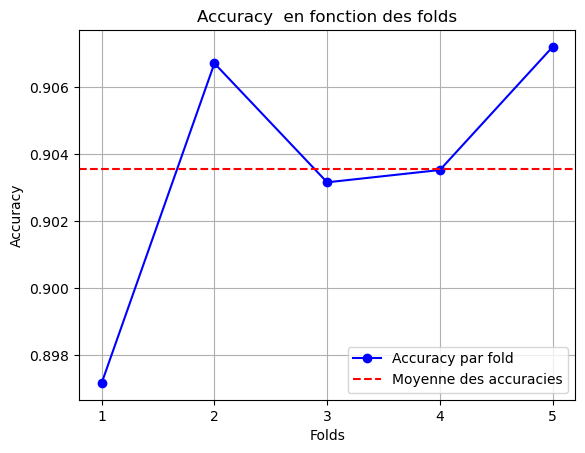

In [72]:
# Creer un graphique pour visualiser l'accuracy en fonction fonction des folds
folds =  np.arange(1, len(scores_kfold) + 1)
plt.plot(folds, scores_kfold, marker='o', linestyle='-', color='blue', label='Accuracy par fold')
plt.axhline(y=np.mean(scores_kfold), linestyle='--', color='red', label='Moyenne des accuracies')

plt.xlabel('Folds')
plt.ylabel('Accuracy')
plt.title('Accuracy  en fonction des folds')
plt.legend()
plt.xticks(folds)
plt.grid()
plt.show()

Le graphique montre que la moyenne des accuracy est autours de 90%

L'une des utilisations pratiques des kfold, c'est de choisir les parametres des modeles que l'on souhaite optimisé. Par exemple, lorsqu'on fait les forets aleatoires, on a besoin d'optimiser le nombre d'arbres ou le nombre de variables à selectionner pour chaque arbre. Pour cela, on peut mettre en place une validation croisée Kfolds pour pouvoir choisir le nombre optimal en fonction de votre performance

### 6. Stratfied KFold (tres utilisé)

### 6.1 Avantages et iconvenients de la alidation croisée stratifiée K-fold

La validation croisée stratifiée K-fold est une variante de la validation croisée K-fold qui vise à préserver la répartition des classes dans les différents folds. Elle est particulièrement utile lorsque l'on travaille avec des données déséquilibrées, c'est-à-dire lorsque certaines classes sont sous-représentées.

Voici les avantages et les inconvénients de cette méthode :

#### 6.1.1 Avantages :

- La validation croisée stratifiée K-fold est plus robuste que la validation croisée K-fold pour les jeux de données déséquilibrés, car elle préserve la répartition des classes dans les différents folds.
- Elle permet d'obtenir une estimation plus fiable de la performance du modèle pour chaque classe individuellement, ainsi que pour l'ensemble du jeu de données.
- Elle est utile lorsque l'on travaille avec des données déséquilibrées ou lorsque l'on souhaite maximiser l'utilisation de toutes les données disponibles pour l'entraînement et l'évaluation.

#### 6.1.2 Inconvénients :

- La validation croisée stratifiée K-fold est plus complexe et plus coûteuse en temps de calcul que la validation croisée K-fold, car elle nécessite de préserver la répartition des classes dans les différents folds.
- Elle peut être moins efficace lorsque les données sont très déséquilibrées, car cela peut conduire à des folds de taille trop petite pour certaines classes, ce qui peut affecter les performances du modèle.
- Si la stratification n'est pas effectuée correctement, cela peut conduire à des biais de sélection et affecter les performances du modèle.

In [24]:
from sklearn.model_selection import StratifiedKFold

# Technique 2 : Stratified K-Fold Cross Validation
stratified_kfold = StratifiedKFold(n_splits=5, random_state=42, shuffle=True)
scores_stratified_kfold = cross_val_score(model, x, y, cv=stratified_kfold, scoring='accuracy')
print(f"Scores avec Stratified K-Fold Cross Validation: {scores_stratified_kfold}")
print(f"Moyenne des scores Stratified K-Fold: {np.mean(scores_stratified_kfold)}")

Scores avec Stratified K-Fold Cross Validation: [0.90304811 0.90303624 0.90303624 0.90475024 0.90438296]
Moyenne des scores Stratified K-Fold: 0.9036507578817654


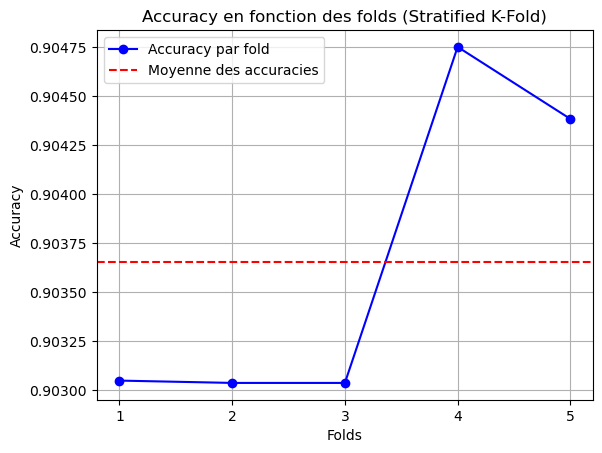

In [28]:
# Creer un graphique pour visualiser l'accuracy en fonction des folds
folds = np.arange(1, len(scores_stratified_kfold) + 1)
plt.plot(folds, scores_stratified_kfold, marker='o', linestyle='-', color='blue', label='Accuracy par fold')
plt.axhline(y=np.mean(scores_stratified_kfold), linestyle='--', color='red', label='Moyenne des accuracies')

plt.xlabel('Folds')
plt.ylabel('Accuracy')
plt.title('Accuracy en fonction des folds (Stratified K-Fold)')
plt.legend()
plt.xticks(folds)
plt.grid()
plt.show()

### 8 Leave One Out (peu utilisé)

#### 8.1 Avantages et inconvenients de la validation leave-one_out

La validation leave-one-out est une méthode d'évaluation de modèle qui consiste à diviser le jeu de données en K sous-ensembles, chacun étant constitué d'un seul exemple (ou "leave-one-out"), puis à entraîner et évaluer le modèle K fois. À chaque fois, un seul exemple est utilisé pour l'évaluation, tandis que les K-1 autres sont utilisés pour l'entraînement.

Voici les avantages et les inconvénients de cette méthode :

#### 8.1.1 Avantages :

- La validation leave-one-out est la méthode d'évaluation la plus précise que l'on puisse utiliser, car elle utilise toutes les données disponibles pour l'entraînement et l'évaluation.
- Elle permet d'obtenir une estimation très fiable de la performance du modèle, car elle ne sous-évalue jamais cette performance.
- Elle est particulièrement utile lorsque l'on travaille avec des jeux de données très petits.

#### 8.1.2 Inconvénients :

- La validation leave-one-out est très coûteuse (**si 1 million de ligne = 1 million de model**) en temps de calcul, car elle nécessite K entraînements et évaluations du modèle.
- Elle peut être moins efficace lorsque le jeu de données est très grand, car les temps de calcul peuvent devenir prohibitifs.
- Elle peut être sensible aux données aberrantes (outliers), car elle entraîne et évalue le modèle pour chaque exemple individuellement, ce qui peut conduire à des résultats instables.

Scores avec Leave-One-Out Cross Validation : [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 0. 1. 1. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1.]
Moyenne des scores Leave-One-Out: 0.93


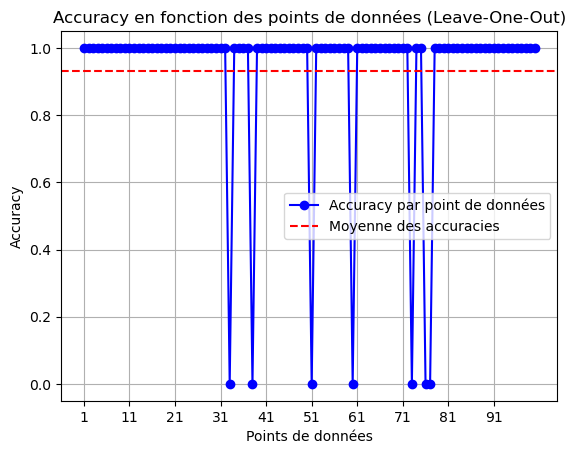

In [34]:
from sklearn.model_selection import LeaveOneOut

# Technique 3 : Leave-One-Out Cross Validation
# Attention : cette méthode peut etre tres lente pour de grands ensembles de données
loo = LeaveOneOut()
scores_loo = cross_val_score(model, x[:100], y[:100], cv=loo, scoring='accuracy')
print(f"Scores avec Leave-One-Out Cross Validation : {scores_loo}")
print(f"Moyenne des scores Leave-One-Out: {np.mean(scores_loo)}")

# Creer un graphique pour visualiser l'accuracy en fonction des points de données
points = np.arange(1, len(scores_loo) + 1)
plt.plot(points, scores_loo, marker='o', linestyle='-', color='blue', label='Accuracy par point de données')
plt.axhline(y=np.mean(scores_loo), linestyle='--', color='red', label='Moyenne des accuracies')

plt.xlabel('Points de données')
plt.ylabel('Accuracy')
plt.title('Accuracy en fonction des points de données (Leave-One-Out)')
plt.legend()
plt.xticks(points[::10]) # Afficher seulement certains points de données sur l'axe des x
plt.grid()
plt.show()

## 9. Leave P Out

### 9.1 Avantages et inconvénients de la validation leave-p-out

La validation leave-p-out est une méthode d'évaluation de modèle qui consiste à diviser le jeu de données en K sous-ensembles, chacun étant constitué de p exemples, puis à entraîner et évaluer le modèle K fois. À chaque fois, p exemples sont utilisés pour l'évaluation, tandis que les K-p autres sont utilisés pour l'entraînement.

Voici les avantages et les inconvénients de cette méthode :

#### 9.1.1 Avantages :

- La validation leave-p-out est plus précise que la validation croisée K-fold pour les jeux de données de petite ou moyenne taille, car elle utilise plus d'exemples pour l'entraînement et l'évaluation.
- Elle permet d'obtenir une estimation plus fiable de la performance du modèle que la validation hold-out, car elle utilise plus d'exemples pour l'évaluation.
- Elle est particulièrement utile lorsque l'on travaille avec des jeux de données de petite ou moyenne taille.

#### 9.1.2 Inconvénients :

- La validation leave-p-out est coûteuse en temps de calcul, car elle nécessite K entraînements et évaluations du modèle.
- Elle peut être moins efficace que la validation croisée K-fold pour les jeux de données très grands, car les temps de calcul peuvent devenir prohibitifs.
- Elle peut être sensible aux données aberrantes (outliers), car elle entraîne et évalue le modèle pour chaque sous-ensemble individuellement, ce qui peut conduire à des résultats instables.

In [ ]:
from sklearn.model_selection import LeaveOneOut

# Technique 4 : Leave-P-Out Cross Validation
# Attention : cette méthode peut etre tres lente pour de grands ensembles de données ou des valeurs de P élevées
p = 2 # Choisir la valeur de P
lpo = LeavePOut(p=p)
scores_lpo = cross_val_score(model, x[:100], y[:100], cv=lpo, scoring='accuracy') # Utiliser une petite portion de x et y 
print(f"Scores avec Leave-P-Out Cross Validation : {scores_lpo}")
print(f"Moyenne des scores Leave-P-Out: {np.mean(scores_lpo)}")

# Creer un graphique pour visualiser l'accuracy en fonction des points de données
subsets = np.arange(1, len(scores_lpo) + 1)
plt.plot(subsets, scores_lpo, marker='o', linestyle='-', color='blue', label='Accuracy par sous-ensemble')
plt.axhline(y=np.mean(scores_lpo), linestyle='--', color='red', label='Moyenne des accuracies')

plt.xlabel('Sous-ensemble')
plt.ylabel('Accuracy')
plt.title('Accuracy en fonction des sous-ensembles (Leave-P-Out)')
plt.legend()
plt.xticks(points[::50]) # Afficher seulement certains sous-ensembles sur l'axe des x
plt.grid()
plt.show()